### The purpose of this notebook to is to recreate the "shelf mask" produced in Amaya et al. (2022)

In [1]:
import os
os.chdir('/vortexfs1/home/anthony.meza/Atmospheric Rivers and Waves')
plotsdir = lambda x="": "/vortexfs1/home/anthony.meza/Atmospheric Rivers and Waves/plots/" + x
GLORYS_dir = lambda x="": "/vortexfs1/home/anthony.meza/GLORYS_data" + x
GLORYS_process_dir = lambda x="": "/vortexfs1/home/anthony.meza/Atmospheric Rivers and Waves/GLORYS_processed/" + x

In [2]:
# from ../help_funcs import * 
# from eofs.xarray import Eof
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import importlib
import xarray as xr
import numpy as np 
import seaborn as sns
import pandas as pd
import cmocean.cm as cm
import netCDF4 as nc
from pathlib import Path
from natsort import natsorted
import matplotlib.pyplot as plt
import gsw

In [3]:
from multiprocessing import Pool
import os 
import multiprocessing
from os.path import exists

In [4]:
%time
from pathlib import Path
from natsort import natsorted
# GLORYS_dir = r"/vortexfs1/home/anthony.meza/GLORYS_data" 
results = [str(result) for result in list(Path(GLORYS_dir()).rglob("*.[nN][cC]"))] #get all files
results = natsorted(results) #sort all files 

years = natsorted(list(set([result[41:45] for result in results])))
months = natsorted(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'])

CPU times: user 1 µs, sys: 2 µs, total: 3 µs
Wall time: 6.44 µs


In [5]:
coords_pth = "/vortexfs1/share/cdx/hseo/Data/MERCATOR/GLO-MFC_001_030_coordinates.nc"
bathy_pth = "/vortexfs1/share/cdx/hseo/Data/MERCATOR/GLO-MFC_001_030_mask_bathy.nc"

In [6]:
is_between = lambda ds, x1, x2 : (x1 < ds) & (ds < x2)
not_between = lambda ds, x1, x2 : (ds < x1) & (x2 < ds)

In [7]:
bathy_ds =  xr.open_dataset(bathy_pth).sel(latitude = slice(-2, 60), longitude = slice(-150, -75) )
bathy = bathy_ds.deptho.sel(latitude = slice(-2, 60), longitude = slice(-150, -75) )
coords = xr.open_dataset(coords_pth).sel(latitude = slice(-2, 60), longitude = slice(-150, -75) )
LON, LAT = np.meshgrid(bathy.longitude, bathy.latitude)
areas = coords.e1t * coords.e2t

In [8]:
wet_mask = bathy_ds.mask.where(bathy_ds.mask == 0, 1, 0).astype('float32')
wet_mask.values[wet_mask.values == 0] = np.nan
wet_mask = wet_mask.sel(longitude = slice(-116, -114), latitude = slice(31, 31.5))
# test = wet_mask.sel(depth = 15, method = "nearest").sel(longitude = slice(-116, -114), latitude = slice(31, 31.5))
# ax = test.plot()
# test.values

In [9]:
#get the depths < 400 meters
t1 = bathy.where(bathy.values < 500, 0.0); 

#isolate the western americas coastline
t2 = bathy.where(is_between(LAT, -2, 2), 0.0);
t3 = bathy.where(is_between(LAT, 18, 60) & is_between(LON, -100, -75), 0,0); t3.values[t3 > 0.0] = np.nan
t4 = bathy.where(is_between(LAT, 14, 18) & is_between(LON, -90, -75), 0,0); t4.values[t4 > 0.0] = np.nan
t5 = bathy.where(is_between(LAT, 10, 14) & is_between(LON, -85, -75), 0,0); t5.values[t5 > 0.0] = np.nan
t6 = bathy.where(is_between(LAT, 9, 11) & is_between(LON, -83, -75), 0,0); t6.values[t6 > 0.0] = np.nan
t7 = bathy.where(is_between(LAT, 50, 60) & is_between(LON, -160, -140), 0,0); t7.values[t7 > 0.0] = np.nan
t8 = bathy.where(is_between(LAT, 8, 10) & is_between(LON, -78, -60), 0,0); t8.values[t8 > 0.0] = np.nan
t9 = bathy.where(is_between(LAT, 10, 20) & is_between(LON, -83, -60), 0,0); t9.values[t9 > 0.0] = np.nan
t10 = bathy.where(is_between(LAT, 3, 7) & is_between(LON, -110, -86), 0,0); t10.values[t10 > 0.0] = np.nan
t11 = bathy.where(is_between(LAT, 12, 15) & is_between(LON, -87, -83), 0,0); t11.values[t11 > 0.0] = np.nan
t12 = bathy.where(is_between(LAT, 15, 20) & is_between(LON, -89, -87), 0,0); t12.values[t12 > 0.0] = np.nan
t13 = bathy.where(is_between(LAT, 7, 10) & is_between(LON, -77, -75), 0,0); t13.values[t13 > 0.0] = np.nan
t14 = bathy.where(is_between(LAT, 8, 10) & is_between(LON, -82, -80), 0,0); t14.values[t14 > 0.0] = np.nan
t15 = bathy.where(is_between(LAT, 10, 20) & is_between(LON, -115, -110), 0,0); t15.values[t15 > 0.0] = np.nan
t16 = bathy.where(is_between(LAT, 22, 25) & is_between(LON, -117, -114), 0,0); t16.values[t16 > 0.0] = np.nan
t17 = bathy.where(is_between(LAT, 27, 30) & is_between(LON, -120, -117), 0,0); t17.values[t17 > 0.0] = np.nan
t18 = bathy.where(is_between(LAT, 8.9, 11) & is_between(LON, -84, -81), 0,0); t18.values[t18 > 0.0] = np.nan
t19 = bathy.where(is_between(LAT, 13, 17) & is_between(LON, -84, -80), 0,0); t19.values[t19 > 0.0] = np.nan
t20 = bathy.where(is_between(LAT, 32, 33.3) & is_between(LON, -120, -117.9), 0,0); t20.values[t20 > 0.0] = np.nan
t21 = bathy.where(is_between(LAT, 33, 33.8) & is_between(LON, -120, -118.7), 0,0); t21.values[t21 > 0.0] = np.nan
t22 = bathy.where(is_between(LAT, 33, 33.6) & is_between(LON, -118.7, -118.3), 0,0); t22.values[t22 > 0.0] = np.nan
t23 = bathy.where(is_between(LAT, 32, 33.5) & is_between(LON, -118.3, -117.7), 0,0); t23.values[t23 > 0.0] = np.nan

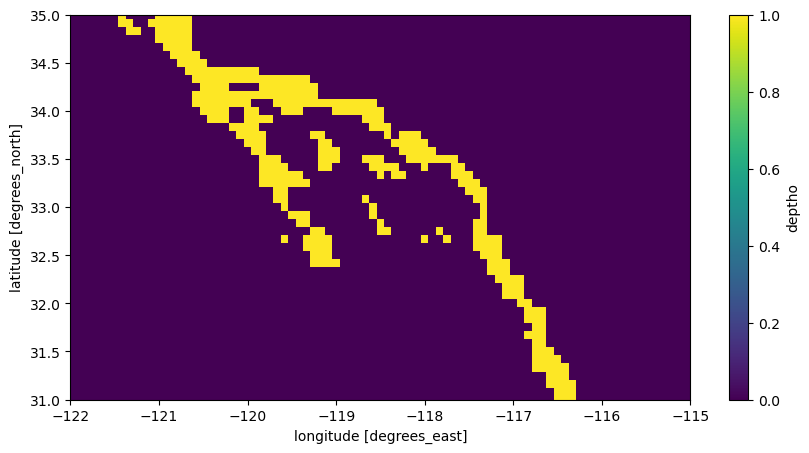

In [10]:
msk = t1 + t2 + t3 + t4 + t5 + t6 + t7 + t8 + t9 + t10 + \
t11 + t12 + t13 + t14 + t15 + t16 + t17 + t18 + t19; 
msk.values[msk ==0 ] = np.nan; msk.values[msk > 0 ] = 1
msk.values[np.isnan(msk)] = 0.0
bathy_ds["CoastMask"] = msk
projection=ccrs.PlateCarree()
# p = msk.plot(figsize = (10, 5))
p = msk.plot(figsize = (10, 5))
ax = p.axes 
ax.set_xlim(-122, -115); 
ax.set_ylim(31, 35); 

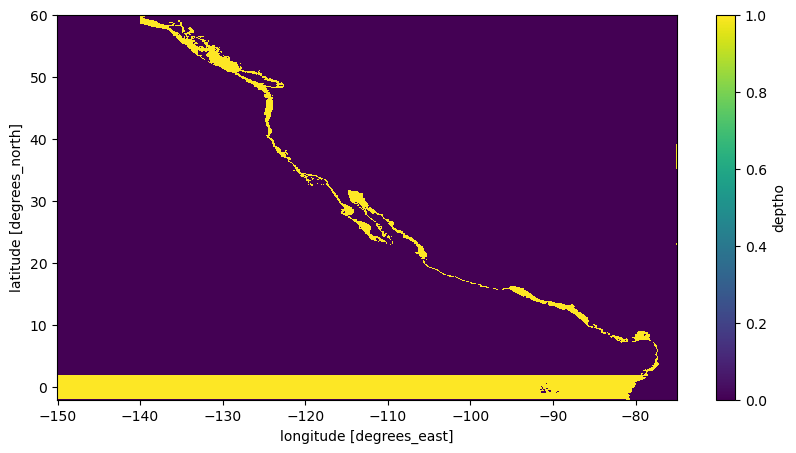

In [11]:
import copy
msk = copy.deepcopy(msk)
msk.values[msk ==0 ] = np.nan; msk.values[msk > 0 ] = 1
msk.values[np.isnan(msk)] = 0.0
bathy_ds["CoastMask"] = msk
projection=ccrs.PlateCarree()
# p = msk.plot(figsize = (10, 5))
p = msk.plot(figsize = (10, 5))
ax = p.axes 

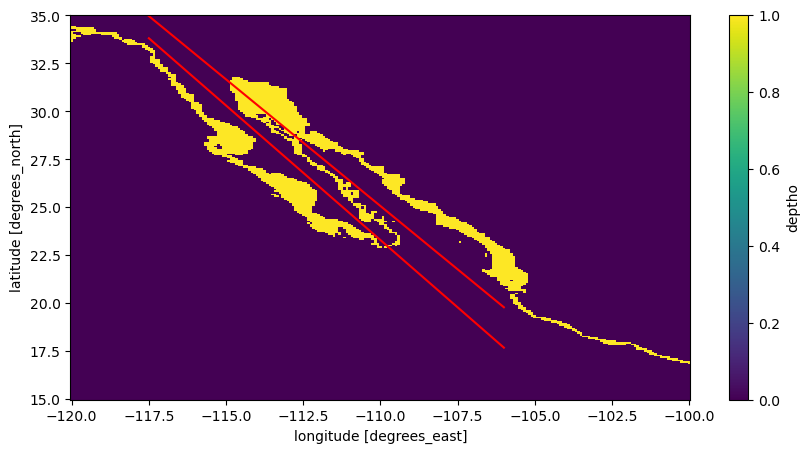

In [12]:
msk = t1 + t2 + t3 + t4 + t5 + t6 + t7 + t8 + t9 + t10 + \
t11 + t12 + t13 + t14 + t15 + t16 + t17 + t18 + t19 + t20 + t21 + t22 + t23
msk.values[msk ==0 ] = np.nan; msk.values[msk > 0 ] = 1
msk.values[np.isnan(msk)] = 0.0
bathy_ds["CoastMask"] = msk
projection=ccrs.PlateCarree()
# p = msk.plot(figsize = (10, 5))
p = msk.sel(latitude = slice(15, 35), longitude = slice(-120, -100) ).plot(figsize = (10, 5))
ax = p.axes 

xs = np.linspace(-117.5, -106, 50)
y1 = 31; x1 = -114.5; y2= 24;x2 = -109.2; m1 = (y2 - y1) / (x2 - x1) 
GC_E_line = lambda x: m1*(x  - x1) + y1

ax.plot(xs, GC_E_line(xs), c = "r")
y1 = 23; x1 = -109.8; y2= 31;x2 = -115.5; m1 = (y2 - y1) / (x2 - x1) 
GC_W_line = lambda x: m1*(x  - x1) + y1
ax.plot(xs, GC_W_line(xs), c = "r")


In [13]:
def islessthanline(lat, lon, f):
    temp = np.empty_like(lat, dtype = bool)
    nrow, ncol = lat.shape
    for j in range(ncol):
        temp[:, j] = (lat[:, j] < f(lon[:, j]))
        
    return temp

def isgreaterthanline(lat, lon, f):
    temp = np.empty_like(lat, dtype = bool)
    nrow, ncol = lat.shape
    for j in range(ncol):
        temp[:, j] = (lat[:, j] > f(lon[:, j]))
    return temp


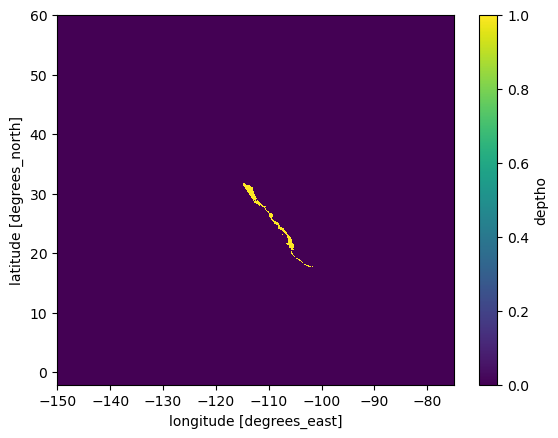

In [14]:
y1 = 31; x1 = -114.5; y2= 24;x2 = -109.2; m1 = (y2 - y1) / (x2 - x1) 
GC_E_line = lambda x: m1*(x  - x1) + y1

gcE2 = bathy.where(is_between(LAT, 35, 60) & is_between(LON, -150, -75), 0,0); gcE2.values[gcE2 > 0.0] = np.nan
gcE3 = bathy.where(is_between(LAT, -10, 17.5) & is_between(LON, -150, -75), 0,0); gcE3.values[gcE3 > 0.0] = np.nan
gcE1 = bathy.where(islessthanline(LAT, LON, GC_E_line), 0.0); gcE1.values[gcE1 > 0.0] = np.nan

msk1 =copy.deepcopy(msk)
msk1 = msk1 + gcE2 + gcE1 + gcE3
msk1.values[msk1 ==0 ] = np.nan; msk1.values[msk1 > 0 ] = 1
msk1.values[np.isnan(msk1)] = 0.0
msk1.plot()
bathy_ds["GC_E"] = msk1

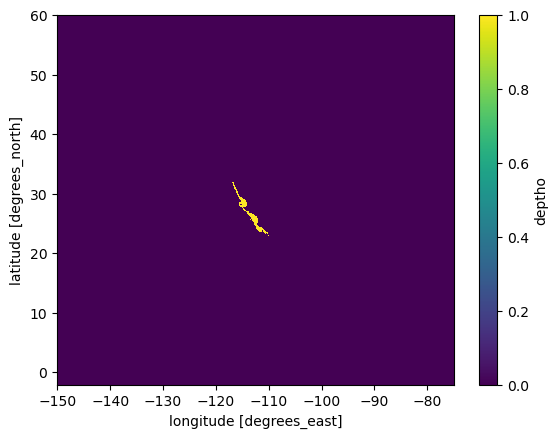

In [15]:
y1 = 23; x1 = -109.8; y2= 31;x2 = -115.5; m1 = (y2 - y1) / (x2 - x1) 
GC_W_line = lambda x: m1*(x  - x1) + y1

gcE2 = bathy.where(is_between(LAT, 32, 60) & is_between(LON, -150, -75), 0,0); gcE2.values[gcE2 > 0.0] = np.nan
gcE3 = bathy.where(is_between(LAT, -10, 10) & is_between(LON, -150, -75), 0,0); gcE3.values[gcE3 > 0.0] = np.nan
gcE4 = bathy.where(is_between(LAT, 10, 30) & is_between(LON, -130, -120), 0,0); gcE3.values[gcE4 > 0.0] = np.nan

gcE1 = bathy.where(isgreaterthanline(LAT, LON, GC_W_line) , 0.0); gcE1.values[gcE1 > 0.0] = np.nan

msk3 = copy.deepcopy(msk)
msk3 = msk3 + gcE2 + gcE1 + gcE3
msk3.values[msk3 ==0 ] = np.nan; msk3.values[msk3 > 0 ] = 1
msk3.values[np.isnan(msk3)] = 0.0
msk3.plot()
bathy_ds["GC_W"] = msk3

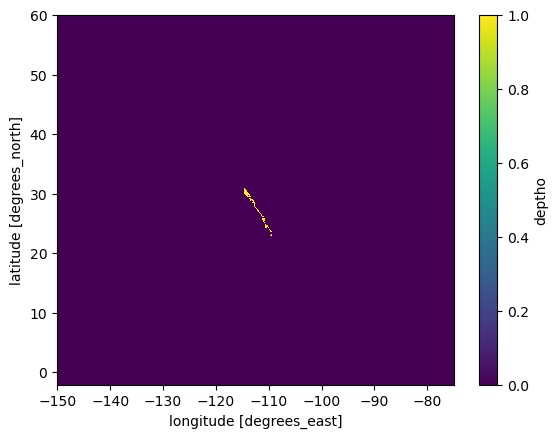

In [16]:
y1 = 23; x1 = -109.8; y2= 31;x2 = -115.5; m1 = (y2 - y1) / (x2 - x1) 
GC_W_line_new = lambda x: m1*(x  - x1) + y1

y12 = 31; x12 = -114.5; y22= 24;x22 = -109; m12 = (y22 - y12) / (x22 - x12) 
GC_E_line_new = lambda x: m12*(x  - x12) + y12

gcE2 = bathy.where(is_between(LAT, 31, 60) & is_between(LON, -150, -75), 0,0); gcE2.values[gcE2 > 0.0] = np.nan
gcE3 = bathy.where(is_between(LAT, -10, 10) & is_between(LON, -150, -75), 0,0); gcE3.values[gcE3 > 0.0] = np.nan
gcE1 = bathy.where(islessthanline(LAT, LON, GC_W_line_new), 0.0); gcE1.values[gcE1 > 0.0] = np.nan
gcE4 = bathy.where(isgreaterthanline(LAT, LON, GC_E_line_new), 0.0); gcE4.values[gcE4 > 0.0] = np.nan

msk2 = copy.deepcopy(msk)
msk2 = msk2 + gcE1 + gcE4 + gcE2 + gcE3
msk2.values[msk2 ==0 ] = np.nan; msk2.values[msk2 > 0 ] = 1
msk2.values[np.isnan(msk2)] = 0.0
msk2.plot()
bathy_ds["GC_C"] = msk2

0.004241435562805873


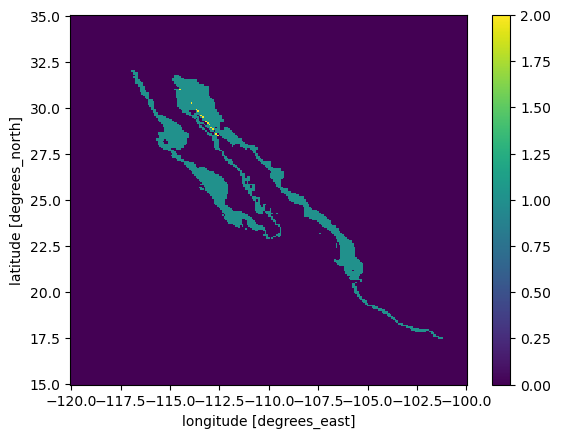

In [17]:
tot_mask = bathy_ds.GC_E + bathy_ds.GC_W + bathy_ds.GC_C
print(np.sum(tot_mask.values > 1) / np.sum(tot_mask.values > 0))
# tot_mask.values[tot_mask.values > 1] = 0
tot_mask.sel(latitude = slice(15, 35), longitude = slice(-120, -100) ).plot()

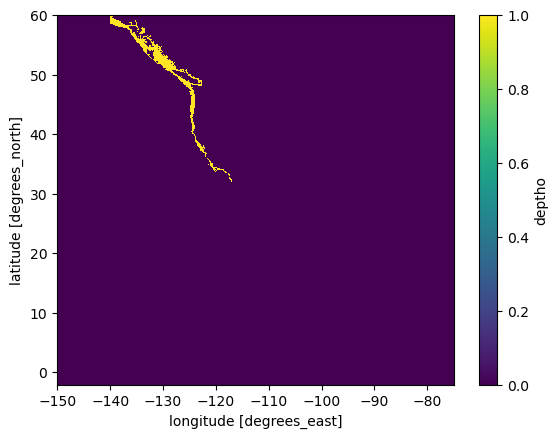

In [18]:
NW = bathy.where(is_between(LAT, -10, 32.01) & is_between(LON, -150, -75), 0,0); NW.values[NW > 0.0] = np.nan
msk3 = copy.deepcopy(msk)
msk3 = msk3 + NW
msk3.values[msk3 ==0 ] = np.nan; msk3.values[msk3 > 0 ] = 1
msk3.values[np.isnan(msk3)] = 0.0
msk3.plot()
bathy_ds["NW"] = msk3

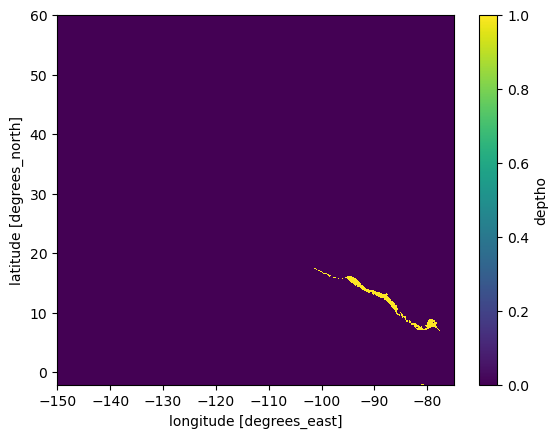

In [19]:
SW = bathy.where(is_between(LAT, 17.49, 60) & is_between(LON, -150, -75), 0,0); SW.values[SW > 0.0] = np.nan
EQ = bathy.where(is_between(LAT, -2, 7) & is_between(LON, -150, -75), 0,0); EQ.values[EQ > 0.0] = np.nan
msk3 = copy.deepcopy(msk)
msk3 = msk3 + SW + EQ
msk3.values[msk3 ==0 ] = np.nan; msk3.values[msk3 > 0 ] = 1
msk3.values[np.isnan(msk3)] = 0.0
msk3.plot()
bathy_ds["SW"] = msk3

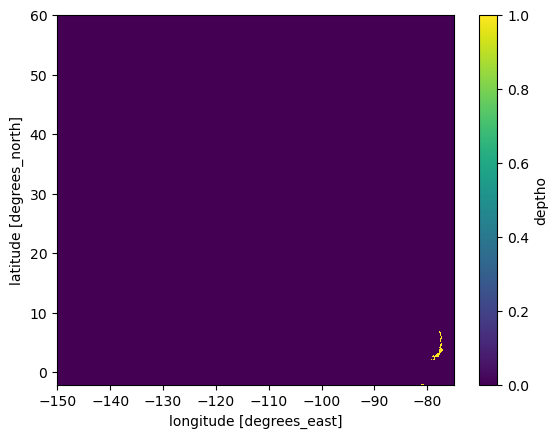

In [20]:
SW = bathy.where(is_between(LAT, 7.01, 60) & is_between(LON, -150, -75), 0,0); SW.values[SW > 0.0] = np.nan
EQ = bathy.where(is_between(LAT, -2, 2.01) & is_between(LON, -150, -75), 0,0); EQ.values[EQ > 0.0] = np.nan
msk3 = copy.deepcopy(msk)
msk3 = msk3 + SW + EQ
msk3.values[msk3 ==0 ] = np.nan; msk3.values[msk3 > 0 ] = 1
msk3.values[np.isnan(msk3)] = 0.0
msk3.plot()
bathy_ds["COL"] = msk3

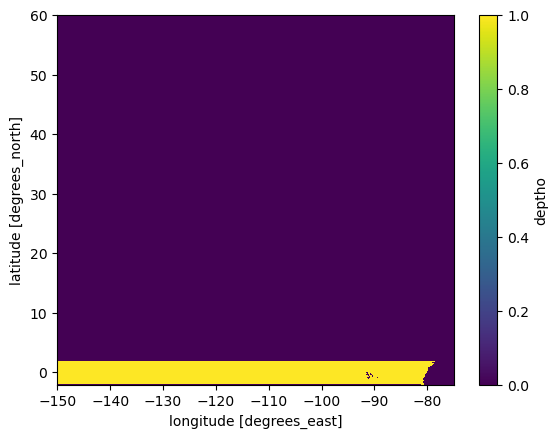

In [21]:
EQonly = bathy.where(is_between(LAT, 1.99, 60) & is_between(LON, -150, -75), 0,0); EQonly.values[EQonly > 0.0] = np.nan
msk3 = copy.deepcopy(msk)
msk3 = msk3 + EQonly
msk3.values[msk3 ==0 ] = np.nan; msk3.values[msk3 > 0 ] = 1
msk3.values[np.isnan(msk3)] = 0.0
msk3.plot()
bathy_ds["EQ"] = msk3

0.8326780781870602


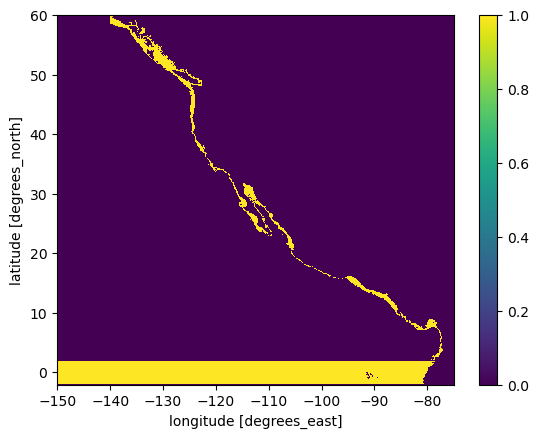

In [22]:
tot_mask = bathy_ds.GC_E + bathy_ds.GC_W + bathy_ds.GC_C + bathy_ds.SW + bathy_ds.NW + bathy_ds.EQ + bathy_ds.COL
print( 100 * (np.sum(tot_mask.values > 1) / np.sum(tot_mask.values > 0)) )
tot_mask.values[tot_mask.values > 1] = 0
tot_mask.plot.pcolormesh()

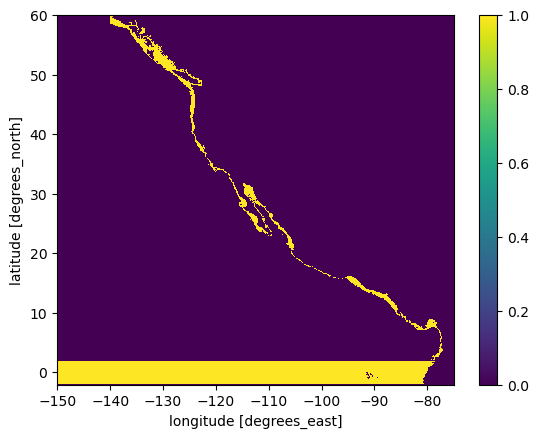

In [23]:
bathy_ds.GC_E.values = bathy_ds.GC_E.values * tot_mask
bathy_ds.GC_W.values = bathy_ds.GC_W.values  * tot_mask
bathy_ds.GC_C.values = bathy_ds.GC_C.values  * tot_mask
bathy_ds.SW.values   = bathy_ds.SW.values  * tot_mask
bathy_ds.NW.values   = bathy_ds.NW.values  * tot_mask
bathy_ds.EQ.values   = bathy_ds.EQ.values * tot_mask
bathy_ds.COL.values   = bathy_ds.COL.values * tot_mask
tot_mask = bathy_ds.GC_E + bathy_ds.GC_W + bathy_ds.GC_C + bathy_ds.SW + bathy_ds.NW + bathy_ds.EQ + bathy_ds.COL
tot_mask.plot()

In [24]:
wet_mask = bathy_ds.mask.where(bathy_ds.mask == 0, 1, 0).astype('float32')
bathy_ds["wet_mask"] = wet_mask
bathy_ds.to_netcdf(GLORYS_process_dir("CaliforniaCoastalMask.nc"))

In [25]:
import copy 
weighted_masks = copy.deepcopy(bathy_ds[["GC_E", "GC_W", "GC_C", "SW", "NW", "EQ", "COL"]])
weighted_masks.GC_E.values = weighted_masks.GC_E.values * areas
weighted_masks.GC_W.values = weighted_masks.GC_W.values  * areas
weighted_masks.GC_C.values = weighted_masks.GC_C.values  * areas
weighted_masks.SW.values   = weighted_masks.SW.values  * areas
weighted_masks.NW.values   = weighted_masks.NW.values  * areas
weighted_masks.EQ.values   = weighted_masks.EQ.values * areas
weighted_masks.COL.values   = weighted_masks.COL.values * areas
weighted_masks.to_netcdf(GLORYS_process_dir("CaliforniaCoastalMaskWeighted.nc"))

[<xarray.DataArray 'lon_path' (distance: 2483)>
 array([False, False, False, ...,  True,  True,  True])
 Dimensions without coordinates: distance]

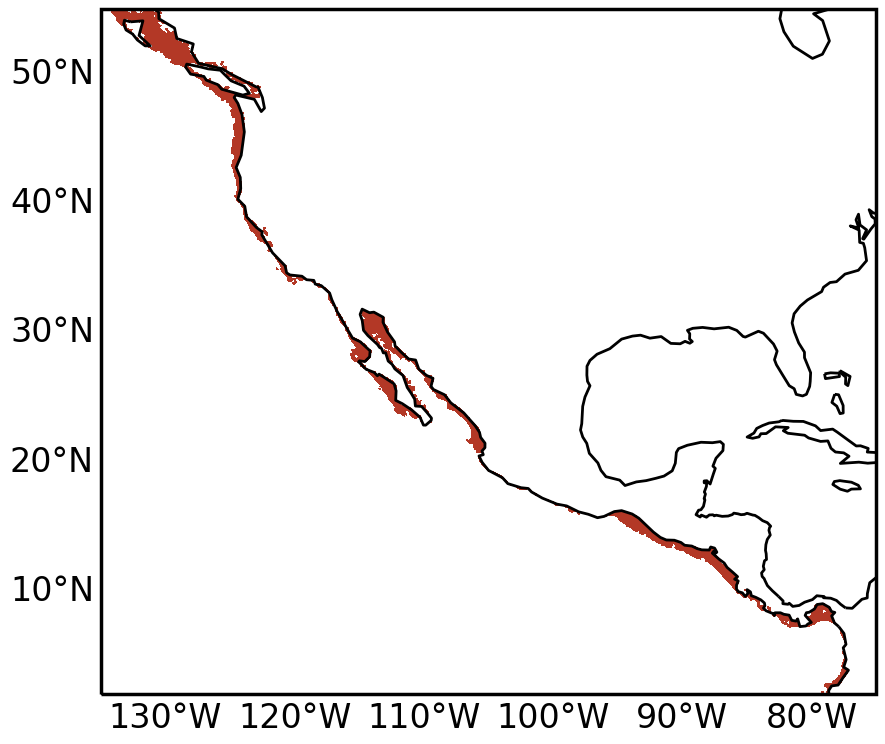